# Dependencies

In [ ]:
%pip install numpy pandas scikit-learn seaborn matplotlib

In [1]:
import numpy as np
import pandas as pd
import itertools

In [4]:
import os

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
import joblib

# Import data

In [6]:
data_frame = pd.read_csv(os.path.join('data', 'WELFake_Dataset.csv'))
data_frame.shape

(72134, 4)

In [7]:
data_frame.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


# Handle Null Values

In [10]:
drop_null_df = data_frame.dropna()
drop_null_df.shape

(71537, 4)

Since only a small number of rows have null values, we drop those rows.

In [11]:
data_frame = drop_null_df

## Get Labels

In [12]:
labels = data_frame.label
labels.head()

0    1
2    1
3    0
4    1
5    1
Name: label, dtype: int64

# Split Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_frame['text'], labels, test_size=0.2, random_state=7)

In [14]:
data_frame.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# Initialize Model

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [43]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

# Prediction

In [44]:
y_pred = pac.predict(tfidf_test)

# Score

In [45]:
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,4)}%')

Accuracy: 95.8555%


# Plotting

In [37]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def plot_accuracy_loss(accuracy, loss):
    epochs = range(1, len(accuracy) + 1)
    
    fig, ax1 = plt.subplots()
    
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy', color='tab:blue')
    ax1.plot(epochs, accuracy, label='Accuracy', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Loss', color='tab:red')
    ax2.plot(epochs, loss, label='Loss', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    fig.tight_layout()
    plt.title('Accuracy and Loss over Epochs')
    plt.show()


In [46]:
confusion_matrix(y_test, y_pred)

array([[6634,  344],
       [ 249, 7081]], dtype=int64)

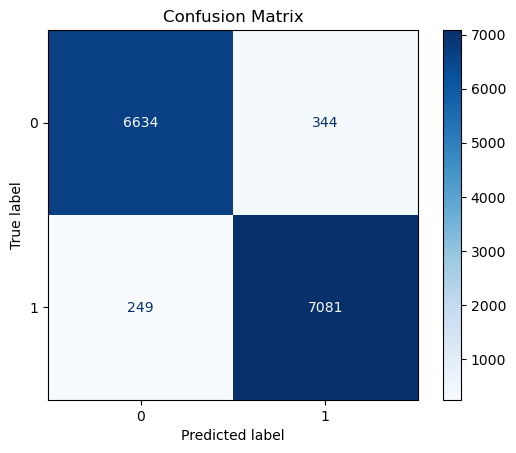

In [47]:
plot_confusion_matrix(y_test, y_pred, labels=[0, 1])

### With this model, we have 6634 true positives, 7081 true negatives, 344 false positives, and 249 false negatives.

In [48]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6978
           1       0.95      0.97      0.96      7330

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



# Save model

In [53]:
# Directory to save the model
model_dir = 'models'

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model to a file in the models directory
model_path = os.path.join(model_dir, 'pac_model.joblib')
joblib.dump(pac, model_path)

['models\\pac_model.joblib']

In [54]:
# Load the model from the file
pac_loaded = joblib.load(model_path)